In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = './src/assessments/statistics/exercise2/Student_Performance.csv'
raw_df = pd.read_csv(file_path)
raw_df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df = raw_df
def dummize(x: str)->int:
  if x == 'Yes':
    return 1
  else:
    return 0

df['numeric_extracurricular_activities'] = df['Extracurricular Activities'].apply(dummize)
df = df.drop([ 'Extracurricular Activities'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hours Studied                       10000 non-null  int64  
 1   Previous Scores                     10000 non-null  int64  
 2   Sleep Hours                         10000 non-null  int64  
 3   Sample Question Papers Practiced    10000 non-null  int64  
 4   Performance Index                   10000 non-null  float64
 5   numeric_extracurricular_activities  10000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [6]:
df.isnull().values.any()

False

Não há valores nulos

In [7]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,numeric_extracurricular_activities
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800,0.494800
std,2.589309,17.343152,1.695863,2.867348,19.212558,0.499998
min,1.000000,40.000000,4.000000,0.000000,10.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000,0.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000,0.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000,1.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000,1.000000


In [13]:
def is_outlier(value: float, column:str)->int:
  outlier_criteria = 3 * np.std(df[column])
  if value > (df[column].mean() + outlier_criteria):
    return 1
  if value < (df[column].mean() - outlier_criteria):
    return -1
  return 0

outliers_df = pd.DataFrame([df[col].map(lambda x: is_outlier(x, col)) for col in df.columns]).transpose()
outliers_df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,numeric_extracurricular_activities
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
9995,0,0,0,0,0,0
9996,0,0,0,0,0,0
9997,0,0,0,0,0,0
9998,0,0,0,0,0,0


In [9]:
outliers_df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,numeric_extracurricular_activities
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


Sem outliers superiores (+1) ou inferiores (-1)

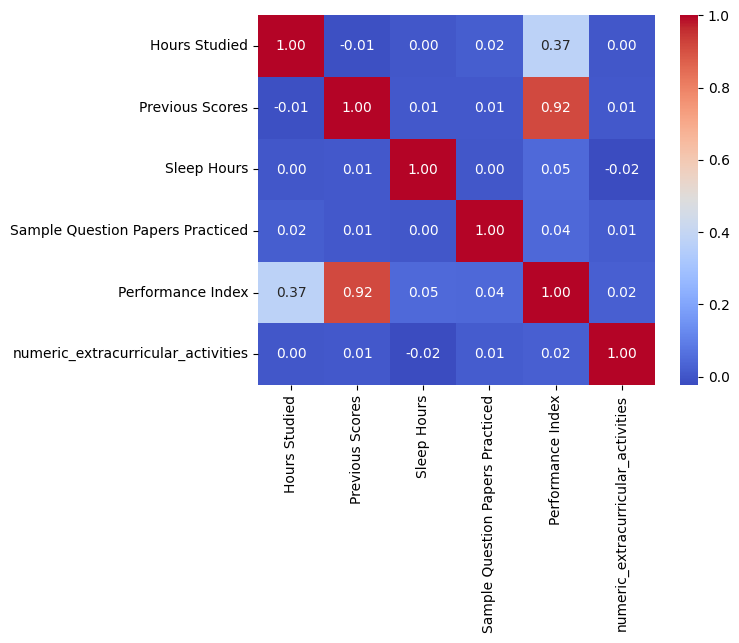

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [16]:
x = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'numeric_extracurricular_activities']]
x = smf.add_constant(x)
smf.regression.linear_model.OLS(df['Performance Index'], x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:47:50   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -34.0756      0.127   -268.010      0.000     -34.325     -33.826
Hours Studied                          2.8530      0.008    362.353      0.000       2.838       2.868
Previous Scores                        1.0184      0.001    866.450      0.000       1.016       1.021
Sleep Hours                            0.4806      0.012     39.972      0.000       0.457       0.504
Sample Question Papers Practiced       0.1938      0.007     27.257      0.000       0.180       0.208
numeric_extracurricular_activities     0.6129      0.041     15.029      0.000       0.533       0.693
==============================================================================
Omnibus:                        3.851   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                4.036
Skew:                           0.013   Prob(JB):                        0.133
Kurtosis:                       3.095   Cond. No.                         452.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

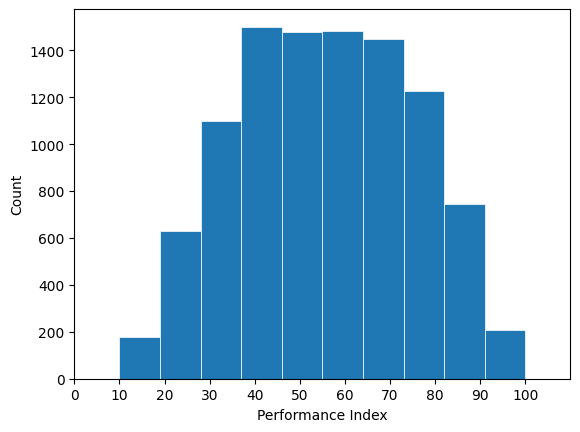

In [14]:
fig, ax = plt.subplots()

ax.hist(df['Performance Index'], bins=10, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 110), xticks=np.arange(0, 110, 10), xlabel='Performance Index', ylabel='Count')
plt.show()